In [ ]:
import pandas as pd
from sklearn import metrics
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import sklearn.model_selection as model_selection


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

## Read In & Understand Data
We will be looking at the Pima Indians Diabetes dataset that can be used to predict whether or not someone has diabetes based on a set of a predictors. Information about this dataset is provided [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database).

In [4]:
url = "http://ddc-datascience.s3-website-us-west-1.amazonaws.com/pima-indians-diabetes.csv"
!curl -s {url} | head | cut -c1-100


6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
3,78,50,32,88,31.0,0.248,26,1
10,115,0,0,0,35.3,0.134,29,0
2,197,70,45,543,30.5,0.158,53,1
8,125,96,0,0,0.0,0.232,54,1


In [5]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv( url, header=None, names=col_names)

In [6]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
pima.shape

(768, 9)

In [8]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
pima.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pregnant,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
bp,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
label,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [10]:
pima['label'].value_counts()


0    500
1    268
Name: label, dtype: int64

In [11]:
X = pima.drop('label',axis=1).copy()
y = pima['label'].copy()

## EDA

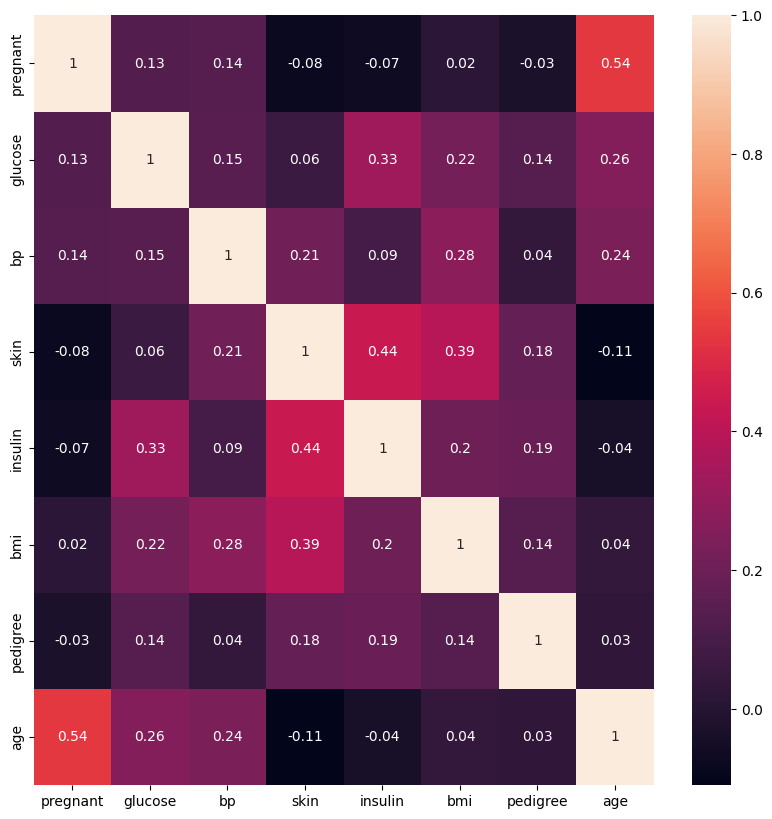

In [12]:
# Checking correlations between predictors
plt.figure(figsize=(10,10))
correlation_matrix = X.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True) ;

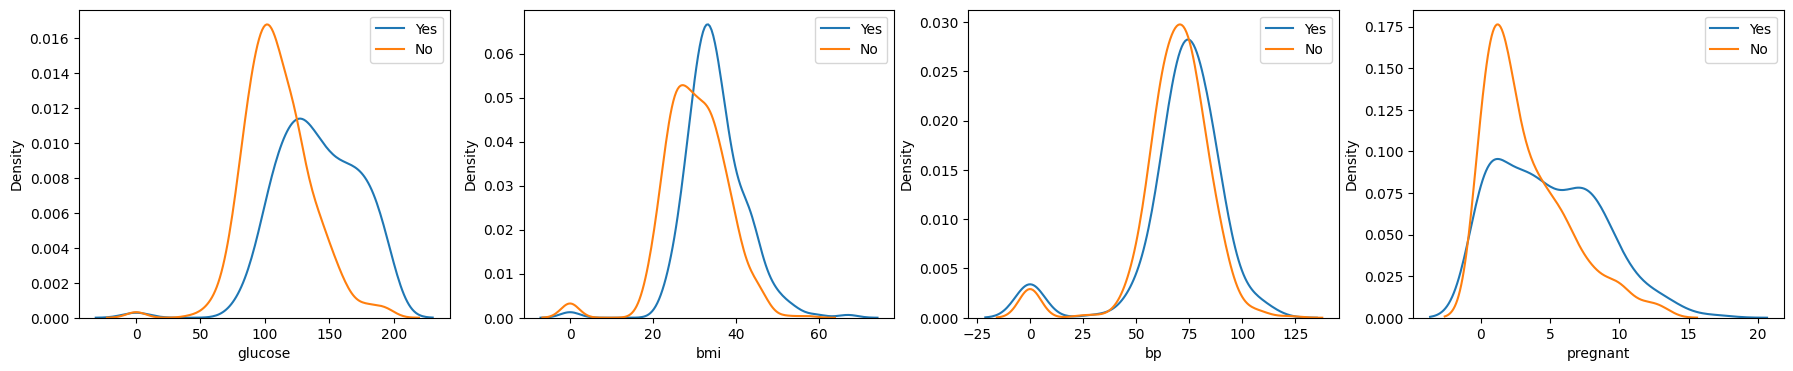

In [13]:
# Look at the distribution of a few predictors for different labels
predictors = ['glucose', 'bmi', 'bp', 'pregnant']

fig, axes = plt.subplots(1,4, figsize= (22,4))
for i,pred in enumerate(predictors):
  sns.kdeplot(pima[pred][y==1], label = 'Yes', ax = axes[i])
  sns.kdeplot(pima[pred][y==0], label = 'No', ax = axes[i])
  axes[i].legend()
plt.show()


## Fit Logistic Model

In [14]:
numLoops = 50
predict_accuracy = np.zeros(numLoops)
predict_f1 = np.zeros(numLoops)
for idx in range(0,50):
  X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.2)
  logreg = LogisticRegression(max_iter=1000)
  logreg.fit(X_train,y_train)
  y_pred = logreg.predict(X_test)
  predict_accuracy[idx] = metrics.accuracy_score(y_test,y_pred)
  predict_f1[idx] = metrics.f1_score(y_test,y_pred)
print(f"Mean Accuracy: {predict_accuracy.mean().round(3)}")
print(f"F1 Score: {predict_f1.mean().round(3)}")

Mean Accuracy: 0.764
F1 Score: 0.623


<Figure size 800x800 with 0 Axes>

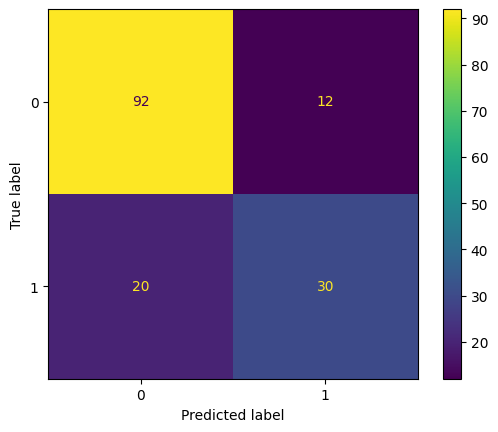

In [15]:
# Let's look at the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot() ;



We are often predicting that someone does not have diabetes even if they do. What can we do to combat this?

In [16]:
# Let's balance our classes
pima_balanced = pima.groupby('label').sample(n = 268, replace = False)

In [17]:
pima_balanced['label'].value_counts()

0    268
1    268
Name: label, dtype: int64

In [18]:
X = pima_balanced.drop('label',axis=1).copy()
y = pima_balanced['label'].copy()

In [19]:
numLoops = 50
predict_accuracy = np.zeros(numLoops)
predict_f1 = np.zeros(numLoops)
for idx in range(0,50):
  X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.2)
  logreg = LogisticRegression(max_iter=1000)
  logreg.fit(X_train,y_train)
  y_pred = logreg.predict(X_test)
  predict_accuracy[idx] = metrics.accuracy_score(y_test,y_pred)
  predict_f1[idx] = metrics.f1_score(y_test,y_pred)
print(f"Mean Accuracy: {predict_accuracy.mean().round(3)}")
print(f"F1 Score: {predict_f1.mean().round(3)}")

Mean Accuracy: 0.743
F1 Score: 0.733


<Figure size 800x800 with 0 Axes>

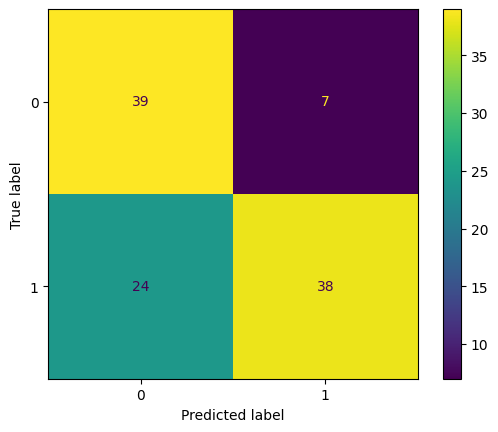

In [20]:
# Let's look at the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot() ;



In [21]:
# How does it make its classifications?
y_pred_proba = logreg.predict_proba(X_test)[:,1]
print(y_pred_proba[0:15]*100)

[46.15331724  4.33071573 27.27262711  2.39503368 91.86482373 21.00689713
 75.72368236 79.86413678 39.95914226 66.87043283 65.26972093 15.91392198
 71.90466962 13.31393662 33.09087074]


Text(0, 0.5, 'Probability of Diabetes')

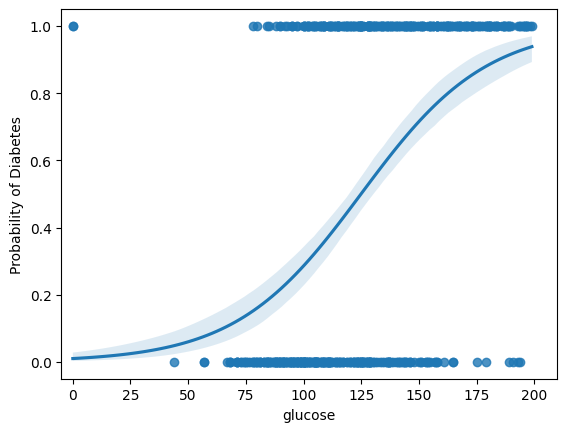

In [22]:
# Plot the model fit
import seaborn as sns
sns.regplot(x='glucose', y='label', data=pima_balanced, logistic=True)
plt.xlim((-5,210))
plt.ylabel('Probability of Diabetes')